In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
class architecture:
    def __init__(self,input_size,hidden_list,batch_size,relu,mnsit):
        self.inp = input_size
        self.hl = hidden_list
        self.bs = batch_size
        self.wt_list = []
        self.delta_wt = []
        self.relu = relu
        self.hl.append(1)
        m = input_size+1
        for i in range(len(self.hl)):
            n = self.hl[i]
            if mnsit:
                wt_mat = (np.random.rand(m,n)-0.5) * 1e-3
            else:
                wt_mat = (np.random.rand(m,n))
            delta_wt_mat = np.zeros((m,n))
            self.wt_list.append(wt_mat)
            self.delta_wt.append(delta_wt_mat)
            m = n+1
    def sigmoid(self,net_j):
        denom = 1 + np.exp(-1 * net_j)
        return (1.0/denom)
    def relu_fn(self,net_j):
        return np.maximum(np.zeros(np.shape(net_j)),net_j)
    def o_js(self,input_x):
        opt_list = []
        ipt_lyr = np.asarray(input_x)
        ipt_lyr = np.matrix(ipt_lyr)
        opt_list.append(ipt_lyr)
        for i in range(len(self.hl)):
            ipt_lyr = np.concatenate((ipt_lyr,[[1]]),axis=1)
            net_j = np.matmul(1.0 * ipt_lyr,self.wt_list[i])
            if self.relu and not (i == len(self.hl) - 1):
                o_j = self.relu_fn(net_j)
            else:
                o_j = self.sigmoid(net_j)
            opt_list.append(o_j)
            ipt_lyr = o_j
        return opt_list
    def back_prop(self,o_js,y):
        num_elem = len(self.hl)
        delta_wt_rev = []
        final_opt = o_js[num_elem][0][0]
        delta_l = (y - final_opt) * final_opt * (1 - final_opt)
        for i in range(num_elem):
            opp = num_elem-i
            o_j_prev = o_js[opp-1]
            o_j_prev = np.concatenate((o_j_prev,[[1]]),axis=1)
            o_j_prev = np.transpose(o_j_prev)
            if i==0:
                delta_wt = -1 * np.matmul(o_j_prev,delta_l)
                delta_wt_rev.append(delta_wt)
                continue
            o_j = o_js[opp]
            if self.relu:
                g_o_j = 1.0 * (o_j >= 0) 
            else:
                g_o_j = np.multiply((1 - o_j),o_j)
            theta_lj = self.wt_list[opp]
            delta_l_theta_lj = np.matmul(theta_lj[0:-1],delta_l)
            new_net_j = -1 * np.multiply(delta_l_theta_lj,np.transpose(g_o_j))
            delta_l = -1 * new_net_j
            delta_wt = np.matmul(o_j_prev,np.transpose(new_net_j))
            delta_wt_rev.append(delta_wt)
        delta_wt_rev.reverse()
        return delta_wt_rev
    def train(self,train_x,train_y,epoch_count,learn_rate_const,fixed,stopping):
        batch_size = self.bs
        iterr = 0
        error_old = 0
        while iterr < epoch_count:
            error_here = 0
            for i in range(len(train_x)):
                if (i%batch_size == 0) or (i==len(train_x)-1):
                    for j in range(len(self.wt_list)):
                        if fixed:
                            learn_rate = learn_rate_const
                        else:
                            learn_rate = learn_rate_const/(1.0 * math.sqrt(iterr+1))
                        self.wt_list[j] -= (learn_rate * self.delta_wt[j])
                        self.delta_wt[j] = 0 * self.delta_wt[j]
                o_js_list = self.o_js(train_x[i])
                final_o = self.output_single(o_js_list)
                error_here += (0.5) * (train_y[i]-final_o) * (train_y[i]-final_o)
                change = self.back_prop(o_js_list,train_y[i])
                for j in range(len(self.wt_list)):
                    self.delta_wt[j] += change[j]
            iterr +=1
            if (abs(error_old-error_here) < stopping) and (not iterr==0):
                return self.wt_list
            error_old = error_here
            print (error_here)
            if iterr%1 ==0:
                print ("epoch_no",iterr,self.accuracy(train_x,train_y))
        return self.wt_list
    def output_single(self,o_js):
        out = o_js[len(self.hl)][0][0]
        return out
    def output(self,predicted_y):
        bool_pred = []
        for i in range(len(predicted_y)):
            bool_pred.append(predicted_y[i]>=0.5)
        return bool_pred
    def accuracy_(self,predicted_y,actual_y):
        counter=0
        for i in range(len(predicted_y)):
            if predicted_y[i]==actual_y[i]:
                counter+=1
        return ((counter*1.0)/len(predicted_y))
    def accuracy(self,X,Y):
        y = []
        for i in range(len(X)):
            out = self.o_js(X[i])
            y.append(self.output_single(out))
        predicted_y = self.output(y)
        accur = self.accuracy_(predicted_y,Y)
        return (accur) 
    def predict(self,X):
        y = []
        for i in range(len(X)):
            out = self.o_js(X[i])
            y.append(self.output_single(out))
        predicted_y = self.output(y)
        return np.asarray(predicted_y)

In [4]:
X = np.genfromtxt('../dataset/toy_trainX.csv',delimiter = ',') # list of training example vectors
Y = np.genfromtxt('../dataset/toy_trainY.csv',delimiter = ',') # list of training example vectors
test_X = np.genfromtxt('../dataset/toy_testX.csv',delimiter = ',') # list of training example vectors
test_Y = np.genfromtxt('../dataset/toy_testY.csv',delimiter = ',') # list of training example vectors


In [10]:
toy_train = architecture(2,[5],len(X),0,0)

In [11]:
bef_acc = toy_train.accuracy(X,Y)   
print (bef_acc)

0.505263157895


In [12]:
toy_train.train(X,Y,150,0.1,1,0)

[[77.56748154]]
('epoch_no', 1, 0.49473684210526314)
[[51.1460128]]
('epoch_no', 2, 0.5052631578947369)
[[74.37087841]]
('epoch_no', 3, 0.49473684210526314)
[[59.02915951]]
('epoch_no', 4, 0.5052631578947369)
[[84.65917789]]
('epoch_no', 5, 0.5052631578947369)
[[73.34773789]]
('epoch_no', 6, 0.49473684210526314)
[[51.35802623]]
('epoch_no', 7, 0.5052631578947369)
[[73.9304566]]
('epoch_no', 8, 0.49473684210526314)
[[49.76093761]]
('epoch_no', 9, 0.5052631578947369)
[[70.80780656]]
('epoch_no', 10, 0.49473684210526314)
[[57.78680937]]
('epoch_no', 11, 0.5052631578947369)
[[80.32217867]]
('epoch_no', 12, 0.5631578947368421)
[[58.41564812]]
('epoch_no', 13, 0.49473684210526314)
[[71.3174089]]
('epoch_no', 14, 0.5052631578947369)
[[58.13035811]]
('epoch_no', 15, 0.5131578947368421)
[[65.82918085]]
('epoch_no', 16, 0.5815789473684211)
[[54.7396682]]
('epoch_no', 17, 0.5684210526315789)
[[57.70124011]]
('epoch_no', 18, 0.5184210526315789)
[[56.49812689]]
('epoch_no', 19, 0.5473684210526316)


[array([[ 4.19322328e+00,  3.28609827e-03,  2.64942920e+00,
          5.78364984e+00,  1.66820806e+00],
        [ 4.79130668e+00,  6.30517415e+00,  3.55129004e+00,
         -6.11505624e+00, -1.61229859e+00],
        [-4.35610142e-01,  2.88887827e-01, -7.56134037e-01,
         -2.08235779e-02, -1.51710007e+00]]), array([[-3.98860913],
        [ 7.91255464],
        [-1.8289979 ],
        [ 6.31988689],
        [-0.95931602],
        [-3.58094671]])]

In [157]:
aft_acc = toy_train.accuracy(X,Y)
print (aft_acc)

0.860526315789


In [158]:
test_accur = toy_train.accuracy(test_X,test_Y)
print (test_accur)

0.808333333333


In [159]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
predictions = logisticRegr.predict(X)
predictions_test = logisticRegr.predict(test_X)
train_accur = toy_train.accuracy_(predictions,Y)
test_accur = toy_train.accuracy_(predictions_test,test_Y)
print (train_accur,test_accur)

(0.45789473684210524, 0.38333333333333336)


In [161]:
def plot_decision_boundary(model, X, y,name):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.savefig("../output/" + name + ".jpg")

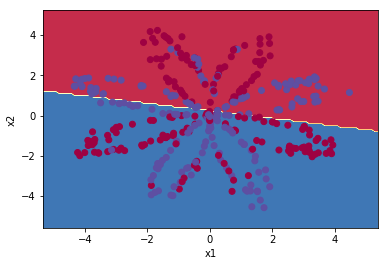

In [162]:
plot_decision_boundary(lambda x:logisticRegr.predict(x),X,Y,"logistic_train")

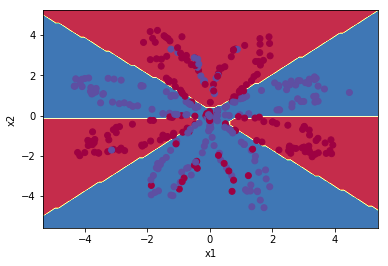

In [163]:
plot_decision_boundary(lambda x:toy_train.predict(x),X,Y,"neural_train_5")

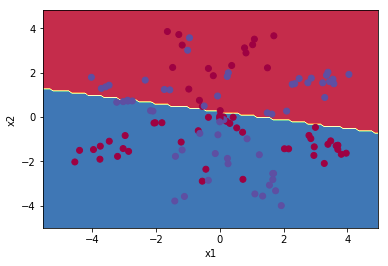

In [164]:
plot_decision_boundary(lambda x:logisticRegr.predict(x),test_X,test_Y,"logistic_test")

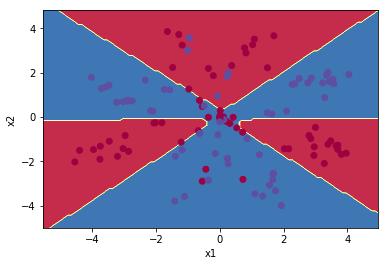

In [165]:
plot_decision_boundary(lambda x:toy_train.predict(x),test_X,test_Y,"neural_test_5")

In [166]:
units = [1,2,3,10,20,40]

[[60.97657906]]
('epoch_no', 1, 0.49473684210526314)
[[61.78384701]]
('epoch_no', 2, 0.5052631578947369)
[[61.51112279]]
('epoch_no', 3, 0.49473684210526314)
[[59.51943137]]
('epoch_no', 4, 0.5052631578947369)
[[61.44296533]]
('epoch_no', 5, 0.49473684210526314)
[[58.23347678]]
('epoch_no', 6, 0.5052631578947369)
[[60.85547599]]
('epoch_no', 7, 0.49473684210526314)
[[57.65282521]]
('epoch_no', 8, 0.5052631578947369)
[[60.15265967]]
('epoch_no', 9, 0.49473684210526314)
[[57.29845571]]
('epoch_no', 10, 0.5052631578947369)
[[59.50629071]]
('epoch_no', 11, 0.49473684210526314)
[[56.9792216]]
('epoch_no', 12, 0.5052631578947369)
[[58.92359414]]
('epoch_no', 13, 0.49473684210526314)
[[56.65994884]]
('epoch_no', 14, 0.5052631578947369)
[[58.38105815]]
('epoch_no', 15, 0.49473684210526314)
[[56.33146384]]
('epoch_no', 16, 0.5052631578947369)
[[57.85900055]]
('epoch_no', 17, 0.49473684210526314)
[[55.98748827]]
('epoch_no', 18, 0.5052631578947369)
[[57.34480998]]
('epoch_no', 19, 0.494736842105

('epoch_no', 154, 0.5052631578947369)
[[53.69514655]]
('epoch_no', 155, 0.5)
[[52.75388977]]
('epoch_no', 156, 0.5052631578947369)
[[53.65474441]]
('epoch_no', 157, 0.5)
[[52.70578604]]
('epoch_no', 158, 0.5052631578947369)
[[53.61132362]]
('epoch_no', 159, 0.5026315789473684)
[[52.6560338]]
('epoch_no', 160, 0.5052631578947369)
[[53.56490126]]
('epoch_no', 161, 0.5026315789473684)
[[52.60475678]]
('epoch_no', 162, 0.5052631578947369)
[[53.5155239]]
('epoch_no', 163, 0.5105263157894737)
[[52.55208943]]
('epoch_no', 164, 0.5052631578947369)
[[53.4632681]]
('epoch_no', 165, 0.5105263157894737)
[[52.49817501]]
('epoch_no', 166, 0.5052631578947369)
[[53.40823996]]
('epoch_no', 167, 0.5131578947368421)
[[52.44316362]]
('epoch_no', 168, 0.5052631578947369)
[[53.35057409]]
('epoch_no', 169, 0.5157894736842106)
[[52.3872101]]
('epoch_no', 170, 0.5052631578947369)
[[53.29043169]]
('epoch_no', 171, 0.5236842105263158)
[[52.33047205]]
('epoch_no', 172, 0.5052631578947369)
[[53.22799815]]
('epoch_

[[54.77355477]]
('epoch_no', 7, 0.49473684210526314)
[[62.78081309]]
('epoch_no', 8, 0.5052631578947369)
[[65.39158131]]
('epoch_no', 9, 0.49473684210526314)
[[49.78088729]]
('epoch_no', 10, 0.5052631578947369)
[[57.90741766]]
('epoch_no', 11, 0.49473684210526314)
[[54.70746446]]
('epoch_no', 12, 0.5052631578947369)
[[62.94710546]]
('epoch_no', 13, 0.55)
[[48.07530877]]
('epoch_no', 14, 0.5710526315789474)
[[49.95232903]]
('epoch_no', 15, 0.49473684210526314)
[[52.02640101]]
('epoch_no', 16, 0.5052631578947369)
[[60.18705813]]
('epoch_no', 17, 0.531578947368421)
[[48.4397318]]
('epoch_no', 18, 0.5710526315789474)
[[51.53415291]]
('epoch_no', 19, 0.49473684210526314)
[[51.41019607]]
('epoch_no', 20, 0.5052631578947369)
[[58.42476562]]
('epoch_no', 21, 0.55)
[[48.09452345]]
('epoch_no', 22, 0.5684210526315789)
[[50.63756023]]
('epoch_no', 23, 0.49473684210526314)
[[50.34715494]]
('epoch_no', 24, 0.5052631578947369)
[[57.04013659]]
('epoch_no', 25, 0.5447368421052632)
[[47.93046298]]
('ep

[[44.82384643]]
('epoch_no', 163, 0.6342105263157894)
[[44.52760388]]
('epoch_no', 164, 0.6052631578947368)
[[44.81250981]]
('epoch_no', 165, 0.6342105263157894)
[[44.51651342]]
('epoch_no', 166, 0.6052631578947368)
[[44.80144207]]
('epoch_no', 167, 0.6342105263157894)
[[44.50559579]]
('epoch_no', 168, 0.6052631578947368)
[[44.79064302]]
('epoch_no', 169, 0.6342105263157894)
[[44.49482606]]
('epoch_no', 170, 0.6052631578947368)
[[44.78010603]]
('epoch_no', 171, 0.6342105263157894)
[[44.484169]]
('epoch_no', 172, 0.6052631578947368)
[[44.76981297]]
('epoch_no', 173, 0.6342105263157894)
[[44.47357376]]
('epoch_no', 174, 0.6052631578947368)
[[44.75972667]]
('epoch_no', 175, 0.6342105263157894)
[[44.46296642]]
('epoch_no', 176, 0.6052631578947368)
[[44.74978005]]
('epoch_no', 177, 0.6342105263157894)
[[44.45224033]]
('epoch_no', 178, 0.6052631578947368)
[[44.73986147]]
('epoch_no', 179, 0.6368421052631579)
[[44.4412443]]
('epoch_no', 180, 0.6052631578947368)
[[44.72979644]]
('epoch_no', 18

[[42.74629396]]
('epoch_no', 18, 0.5052631578947369)
[[50.07462674]]
('epoch_no', 19, 0.49473684210526314)
[[65.37370978]]
('epoch_no', 20, 0.6473684210526316)
[[40.93377382]]
('epoch_no', 21, 0.7210526315789474)
[[38.0754851]]
('epoch_no', 22, 0.5342105263157895)
[[45.26351198]]
('epoch_no', 23, 0.49473684210526314)
[[63.32163517]]
('epoch_no', 24, 0.6894736842105263)
[[37.90012604]]
('epoch_no', 25, 0.6815789473684211)
[[37.89503001]]
('epoch_no', 26, 0.5052631578947369)
[[51.29965162]]
('epoch_no', 27, 0.49473684210526314)
[[58.49084738]]
('epoch_no', 28, 0.7447368421052631)
[[36.36882096]]
('epoch_no', 29, 0.6789473684210526)
[[38.79756105]]
('epoch_no', 30, 0.5657894736842105)
[[47.14003432]]
('epoch_no', 31, 0.6210526315789474)
[[50.89304916]]
('epoch_no', 32, 0.7315789473684211)
[[36.46219483]]
('epoch_no', 33, 0.6921052631578948)
[[38.16845499]]
('epoch_no', 34, 0.7157894736842105)
[[40.15143557]]
('epoch_no', 35, 0.6763157894736842)
[[41.29995871]]
('epoch_no', 36, 0.734210526

[[19.705974]]
('epoch_no', 173, 0.8868421052631579)
[[19.2877572]]
('epoch_no', 174, 0.8710526315789474)
[[19.67567474]]
('epoch_no', 175, 0.8868421052631579)
[[19.26257224]]
('epoch_no', 176, 0.8710526315789474)
[[19.64603142]]
('epoch_no', 177, 0.8868421052631579)
[[19.23789547]]
('epoch_no', 178, 0.8710526315789474)
[[19.61702115]]
('epoch_no', 179, 0.8868421052631579)
[[19.21371004]]
('epoch_no', 180, 0.8736842105263158)
[[19.58862215]]
('epoch_no', 181, 0.8868421052631579)
[[19.18999987]]
('epoch_no', 182, 0.8736842105263158)
[[19.56081372]]
('epoch_no', 183, 0.8842105263157894)
[[19.16674962]]
('epoch_no', 184, 0.8736842105263158)
[[19.53357609]]
('epoch_no', 185, 0.8842105263157894)
[[19.1439446]]
('epoch_no', 186, 0.8736842105263158)
[[19.50689044]]
('epoch_no', 187, 0.8842105263157894)
[[19.12157083]]
('epoch_no', 188, 0.8736842105263158)
[[19.48073879]]
('epoch_no', 189, 0.8842105263157894)
[[19.09961488]]
('epoch_no', 190, 0.8736842105263158)
[[19.45510399]]
('epoch_no', 191

[[46.60857279]]
('epoch_no', 25, 0.5052631578947369)
[[58.84350177]]
('epoch_no', 26, 0.49473684210526314)
[[77.86990311]]
('epoch_no', 27, 0.5710526315789474)
[[62.96678189]]
('epoch_no', 28, 0.5973684210526315)
[[54.74203998]]
('epoch_no', 29, 0.6131578947368421)
[[50.60072776]]
('epoch_no', 30, 0.6236842105263158)
[[44.05753523]]
('epoch_no', 31, 0.5105263157894737)
[[52.24259181]]
('epoch_no', 32, 0.49473684210526314)
[[74.89007577]]
('epoch_no', 33, 0.6263157894736842)
[[56.10447497]]
('epoch_no', 34, 0.6157894736842106)
[[50.49840168]]
('epoch_no', 35, 0.6947368421052632)
[[47.36875246]]
('epoch_no', 36, 0.7)
[[42.25914739]]
('epoch_no', 37, 0.6789473684210526)
[[40.91864015]]
('epoch_no', 38, 0.5605263157894737)
[[63.72913281]]
('epoch_no', 39, 0.6868421052631579)
[[47.35565913]]
('epoch_no', 40, 0.7289473684210527)
[[42.5172348]]
('epoch_no', 41, 0.7973684210526316)
[[32.5011977]]
('epoch_no', 42, 0.7236842105263158)
[[34.86325616]]
('epoch_no', 43, 0.5789473684210527)
[[67.355

('epoch_no', 180, 0.8631578947368421)
[[20.49377461]]
('epoch_no', 181, 0.8736842105263158)
[[19.76665655]]
('epoch_no', 182, 0.8631578947368421)
[[20.4561784]]
('epoch_no', 183, 0.8736842105263158)
[[19.73650159]]
('epoch_no', 184, 0.8631578947368421)
[[20.41941189]]
('epoch_no', 185, 0.8763157894736842)
[[19.7069301]]
('epoch_no', 186, 0.8631578947368421)
[[20.38344285]]
('epoch_no', 187, 0.8789473684210526)
[[19.67792219]]
('epoch_no', 188, 0.8657894736842106)
[[20.34824079]]
('epoch_no', 189, 0.8789473684210526)
[[19.64945916]]
('epoch_no', 190, 0.8657894736842106)
[[20.31377681]]
('epoch_no', 191, 0.8789473684210526)
[[19.62152345]]
('epoch_no', 192, 0.8657894736842106)
[[20.28002353]]
('epoch_no', 193, 0.8789473684210526)
[[19.5940985]]
('epoch_no', 194, 0.8657894736842106)
[[20.24695491]]
('epoch_no', 195, 0.8789473684210526)
[[19.56716872]]
('epoch_no', 196, 0.8657894736842106)
[[20.2145462]]
('epoch_no', 197, 0.8789473684210526)
[[19.54071939]]
('epoch_no', 198, 0.865789473684

('epoch_no', 33, 0.5763157894736842)
[[56.01094189]]
('epoch_no', 34, 0.5052631578947369)
[[84.21656934]]
('epoch_no', 35, 0.5421052631578948)
[[80.56825807]]
('epoch_no', 36, 0.5473684210526316)
[[77.67368981]]
('epoch_no', 37, 0.5578947368421052)
[[75.62414355]]
('epoch_no', 38, 0.5605263157894737)
[[72.10280256]]
('epoch_no', 39, 0.6)
[[51.07109412]]
('epoch_no', 40, 0.5)
[[74.98372458]]
('epoch_no', 41, 0.6868421052631579)
[[38.89939465]]
('epoch_no', 42, 0.5368421052631579)
[[81.26380947]]
('epoch_no', 43, 0.5763157894736842)
[[77.14596175]]
('epoch_no', 44, 0.5736842105263158)
[[73.2776989]]
('epoch_no', 45, 0.5921052631578947)
[[53.83560653]]
('epoch_no', 46, 0.49473684210526314)
[[82.61597534]]
('epoch_no', 47, 0.6026315789473684)
[[63.55784065]]
('epoch_no', 48, 0.6657894736842105)
[[48.12582322]]
('epoch_no', 49, 0.7)
[[44.93314265]]
('epoch_no', 50, 0.5973684210526315)
[[66.97948322]]
('epoch_no', 51, 0.6710526315789473)
[[54.82605149]]
('epoch_no', 52, 0.7131578947368421)
[

[[23.08959345]]
('epoch_no', 190, 0.8236842105263158)
[[28.8515672]]
('epoch_no', 191, 0.8789473684210526)
[[20.91836646]]
('epoch_no', 192, 0.8763157894736842)
[[21.04562997]]
('epoch_no', 193, 0.868421052631579)
[[21.31691426]]
('epoch_no', 194, 0.8578947368421053)
[[24.58576192]]
('epoch_no', 195, 0.8289473684210527)
[[23.39721937]]
('epoch_no', 196, 0.8210526315789474)
[[29.5362447]]
('epoch_no', 197, 0.8842105263157894)
[[20.88227783]]
('epoch_no', 198, 0.8842105263157894)
[[20.63938618]]
('epoch_no', 199, 0.8789473684210526)
[[20.98787675]]
('epoch_no', 200, 0.8578947368421053)
[[21.41361523]]
('epoch_no', 201, 0.8473684210526315)
[[25.22334284]]
('epoch_no', 202, 0.8447368421052631)
[[22.69869401]]
('epoch_no', 203, 0.8289473684210527)
[[28.23223758]]
('epoch_no', 204, 0.881578947368421)
[[20.74913777]]
('epoch_no', 205, 0.8763157894736842)
[[21.10305594]]
('epoch_no', 206, 0.8552631578947368)
[[21.58958094]]
('epoch_no', 207, 0.8421052631578947)
[[25.7195672]]
('epoch_no', 208,

('epoch_no', 43, 0.6263157894736842)
[[70.56395304]]
('epoch_no', 44, 0.6289473684210526)
[[69.55036888]]
('epoch_no', 45, 0.631578947368421)
[[68.66635366]]
('epoch_no', 46, 0.6289473684210526)
[[67.76825994]]
('epoch_no', 47, 0.631578947368421)
[[66.71204999]]
('epoch_no', 48, 0.6421052631578947)
[[65.39155846]]
('epoch_no', 49, 0.65)
[[63.65424094]]
('epoch_no', 50, 0.65)
[[60.13774871]]
('epoch_no', 51, 0.6842105263157895)
[[45.24401159]]
('epoch_no', 52, 0.5736842105263158)
[[79.25649375]]
('epoch_no', 53, 0.5815789473684211)
[[76.97414384]]
('epoch_no', 54, 0.5921052631578947)
[[73.57578096]]
('epoch_no', 55, 0.75)
[[33.65075546]]
('epoch_no', 56, 0.6131578947368421)
[[68.08678733]]
('epoch_no', 57, 0.6342105263157894)
[[64.72041227]]
('epoch_no', 58, 0.6578947368421053)
[[62.21176122]]
('epoch_no', 59, 0.6657894736842105)
[[58.04347682]]
('epoch_no', 60, 0.718421052631579)
[[43.63463213]]
('epoch_no', 61, 0.5842105263157895)
[[70.79160156]]
('epoch_no', 62, 0.6578947368421053)
[

[[21.73321344]]
('epoch_no', 198, 0.8157894736842105)
[[25.41502718]]
('epoch_no', 199, 0.7763157894736842)
[[39.34415188]]
('epoch_no', 200, 0.8131578947368421)
[[31.41223581]]
('epoch_no', 201, 0.881578947368421)
[[21.08762611]]
('epoch_no', 202, 0.8736842105263158)
[[21.02846842]]
('epoch_no', 203, 0.8394736842105263)
[[22.79370515]]
('epoch_no', 204, 0.7973684210526316)
[[35.1825428]]
('epoch_no', 205, 0.8710526315789474)
[[23.68160595]]
('epoch_no', 206, 0.8342105263157895)
[[23.8384883]]
('epoch_no', 207, 0.7921052631578948)
[[35.81621696]]
('epoch_no', 208, 0.8631578947368421)
[[24.39443466]]
('epoch_no', 209, 0.8394736842105263)
[[23.03146725]]
('epoch_no', 210, 0.8105263157894737)
[[32.45610112]]
('epoch_no', 211, 0.8763157894736842)
[[21.67961583]]
('epoch_no', 212, 0.8526315789473684)
[[21.85206541]]
('epoch_no', 213, 0.8368421052631579)
[[28.8305178]]
('epoch_no', 214, 0.8763157894736842)
[[20.77697546]]
('epoch_no', 215, 0.868421052631579)
[[21.82930785]]
('epoch_no', 216,

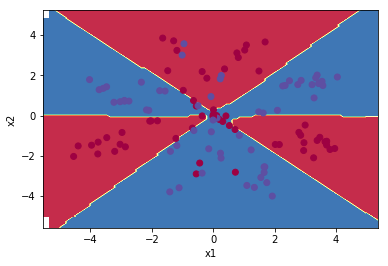

In [168]:
for i in range(len(units)):
    toy_train = architecture(2,[units[i]],len(X),0,0)
    toy_train.train(X,Y,300,0.1,1,0)
    aft_acc = toy_train.accuracy(X,Y)
    print ("train accuracy ", units[i],aft_acc)
    test_accur = toy_train.accuracy(test_X,test_Y)
    print ("test accuracy ", units[i],test_accur)
    plot_decision_boundary(lambda x:toy_train.predict(x),X,Y,"neural_train_"+(str)(units[i]))
    plot_decision_boundary(lambda x:toy_train.predict(x),test_X,test_Y,"neural_test_"+(str)(units[i]))    

In [13]:
toy_train = architecture(2,[5,5],len(X),0,0)
toy_train.train(X,Y,400,0.1,1,0)
aft_acc = toy_train.accuracy(X,Y)
print ("train accuracy 2 layer",aft_acc)
test_accur = toy_train.accuracy(test_X,test_Y)
print ("test accuracy 2 layer",test_accur)
plot_decision_boundary(lambda x:toy_train.predict(x),X,Y,"neural_train_2_layers")
plot_decision_boundary(lambda x:toy_train.predict(x),test_X,test_Y,"neural_test_2_layers")    

[[84.86924342]]
('epoch_no', 1, 0.49473684210526314)
[[54.45864475]]
('epoch_no', 2, 0.5052631578947369)
[[93.48259456]]
('epoch_no', 3, 0.5052631578947369)
[[93.3487966]]
('epoch_no', 4, 0.5052631578947369)
[[93.13372294]]
('epoch_no', 5, 0.5052631578947369)
[[92.74283669]]
('epoch_no', 6, 0.5052631578947369)
[[91.87490593]]
('epoch_no', 7, 0.5052631578947369)
[[89.08637087]]
('epoch_no', 8, 0.5052631578947369)
[[70.3284792]]
('epoch_no', 9, 0.49473684210526314)
[[93.70422112]]
('epoch_no', 10, 0.49473684210526314)
[[91.00158964]]
('epoch_no', 11, 0.49473684210526314)
[[75.90224839]]
('epoch_no', 12, 0.5052631578947369)
[[80.40799407]]
('epoch_no', 13, 0.49473684210526314)
[[52.01819467]]
('epoch_no', 14, 0.5052631578947369)
[[79.70791263]]
('epoch_no', 15, 0.49473684210526314)
[[48.01693746]]
('epoch_no', 16, 0.5052631578947369)
[[53.35763506]]
('epoch_no', 17, 0.49473684210526314)
[[70.79146574]]
('epoch_no', 18, 0.5052631578947369)
[[57.66241828]]
('epoch_no', 19, 0.494736842105263

[[52.19165425]]
('epoch_no', 155, 0.5342105263157895)
[[51.3461873]]
('epoch_no', 156, 0.5052631578947369)
[[51.91595557]]
('epoch_no', 157, 0.5394736842105263)
[[51.11464973]]
('epoch_no', 158, 0.5052631578947369)
[[51.62091098]]
('epoch_no', 159, 0.5421052631578948)
[[50.8712632]]
('epoch_no', 160, 0.5052631578947369)
[[51.31075103]]
('epoch_no', 161, 0.5473684210526316)
[[50.61850904]]
('epoch_no', 162, 0.5052631578947369)
[[50.99052877]]
('epoch_no', 163, 0.55)
[[50.35930985]]
('epoch_no', 164, 0.5052631578947369)
[[50.66572786]]
('epoch_no', 165, 0.5578947368421052)
[[50.09688281]]
('epoch_no', 166, 0.5052631578947369)
[[50.34180292]]
('epoch_no', 167, 0.5631578947368421)
[[49.83453364]]
('epoch_no', 168, 0.5052631578947369)
[[50.02373486]]
('epoch_no', 169, 0.5657894736842105)
[[49.57542071]]
('epoch_no', 170, 0.5052631578947369)
[[49.71568127]]
('epoch_no', 171, 0.5710526315789474)
[[49.32233318]]
('epoch_no', 172, 0.5052631578947369)
[[49.42077449]]
('epoch_no', 173, 0.57105263

[[45.03984983]]
('epoch_no', 309, 0.6210526315789474)
[[45.10960017]]
('epoch_no', 310, 0.6289473684210526)
[[45.03249525]]
('epoch_no', 311, 0.6210526315789474)
[[45.10545314]]
('epoch_no', 312, 0.6289473684210526)
[[45.02550885]]
('epoch_no', 313, 0.6210526315789474)
[[45.10174336]]
('epoch_no', 314, 0.6289473684210526)
[[45.01888545]]
('epoch_no', 315, 0.6210526315789474)
[[45.09846703]]
('epoch_no', 316, 0.6289473684210526)
[[45.01261961]]
('epoch_no', 317, 0.6210526315789474)
[[45.09561994]]
('epoch_no', 318, 0.6289473684210526)
[[45.00670555]]
('epoch_no', 319, 0.6210526315789474)
[[45.09319742]]
('epoch_no', 320, 0.6289473684210526)
[[45.00113712]]
('epoch_no', 321, 0.6210526315789474)
[[45.09119422]]
('epoch_no', 322, 0.6289473684210526)
[[44.99590771]]
('epoch_no', 323, 0.6210526315789474)
[[45.08960444]]
('epoch_no', 324, 0.6289473684210526)
[[44.9910102]]
('epoch_no', 325, 0.6210526315789474)
[[45.08842146]]
('epoch_no', 326, 0.6289473684210526)
[[44.98643695]]
('epoch_no', 

NameError: name 'plot_decision_boundary' is not defined

In [170]:
X = np.genfromtxt('../dataset/MNIST_train.csv',delimiter = ',',dtype='float32') # list of training example vectors
Y = 1 * (X[:,len(X[0])-1] == 6)
X = np.delete(X,len(X[0])-1,1)
X = X/255
test_X = np.genfromtxt('../dataset/MNIST_test.csv',delimiter = ',',dtype = 'float32') # list of training example vectors
test_Y = 1 * (test_X[:,len(test_X[0])-1]==6)
test_X = np.delete(test_X,len(test_X[0])-1,1)
test_X = test_X/255

In [171]:
digit = architecture(len(X[0]),[],1,0,1)

In [172]:
bef_acc = digit.accuracy(X,Y)
print ("train accuracy ",bef_acc)
digit.train(X,Y,50,0.1,1,0)
aft_acc = digit.accuracy(X,Y)
print ("train accuracy ",aft_acc)
test_accur = digit.accuracy(test_X,test_Y)
print ("test accuracy ",test_accur)

('train accuracy ', 0.6072)
[[22.48409448]]
('epoch_no', 1, 0.5)
[[9.37403461]]
('epoch_no', 2, 0.5103)
[[6.13180223]]
('epoch_no', 3, 0.5587)
[[5.64516479]]
('epoch_no', 4, 0.6168)
[[5.50545684]]
('epoch_no', 5, 0.6688)
[[5.41958376]]
('epoch_no', 6, 0.7104)
[[5.33848994]]
('epoch_no', 7, 0.7409)
[[5.27648384]]
('epoch_no', 8, 0.7692)
[[5.2226783]]
('epoch_no', 9, 0.7928)
[[5.16437959]]
('epoch_no', 10, 0.8137)
[[5.09790777]]
('epoch_no', 11, 0.8326)
[[5.03548193]]
('epoch_no', 12, 0.8465)
[[4.99529015]]
('epoch_no', 13, 0.8576)
[[4.97857699]]
('epoch_no', 14, 0.8665)
[[4.97361804]]
('epoch_no', 15, 0.8769)
[[4.97164872]]
('epoch_no', 16, 0.8842)
[[4.96915483]]
('epoch_no', 17, 0.8906)
[[4.96516034]]
('epoch_no', 18, 0.8964)
[[4.95956351]]
('epoch_no', 19, 0.9012)
[[4.95249228]]
('epoch_no', 20, 0.9056)
[[4.94410729]]
('epoch_no', 21, 0.9092)
[[4.93456535]]
('epoch_no', 22, 0.9125)
[[4.92401854]]
('epoch_no', 23, 0.9171)
[[4.91260319]]
('epoch_no', 24, 0.9194)
[[4.90041693]]
('epoch_n

In [173]:
digit_new = architecture(len(X[0]),[100],1,0,1)

In [ ]:
digit_new.train(X,Y,120,1,0,1e-3)

In [ ]:
aft_acc = digit_new.accuracy(X,Y)
print ("train accuracy ",aft_acc)
test_accur = digit_new.accuracy(test_X,test_Y)
print ("test accuracy ",test_accur)

In [ ]:
digit_relu = architecture(len(X[0]),[100],1,1,1)

In [ ]:
digit_relu.train(X,Y,10,0.1,0,1e-2)

In [ ]:
aft_acc = digit_relu.accuracy(X,Y)
print ("train accuracy ",aft_acc)
test_accur = digit_relu.accuracy(test_X,test_Y)
print ("test accuracy ",test_accur)